In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('D:\GIT1\Machine-Learning\Decision Trees\salaries.csv')
data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [5]:
#Assigning the Target(y) and Features(X)
X =data.drop('salary_more_then_100k',axis=1)
y = data['salary_more_then_100k']

In [10]:
#Define the nominal and ordinal features
custom_order_jobs= ['sales executive','computer programmer','business manager']  #Create rank in the ordinal features 1.(sales executive)...3.(business manager)
custom_order_degree = ['bachelors','masters']    #Create rank in the ordinal features 1.(bachelors)...2.(masters)


In [13]:
#Define the ordinal and nominal features
nominal_features = ['company']
ordinal_features = ['job','degree']

#creating the transformers for encoders
nominal_transformers = OneHotEncoder(drop='first')
ordinal_transformers = OrdinalEncoder(categories=[custom_order_jobs,custom_order_degree])


In [18]:
#applying column transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ord',ordinal_transformers,ordinal_features),
        ('nom',nominal_transformers,nominal_features)
    ]
)
preprocessor

ColumnTransformer(transformers=[('ord',
                                 OrdinalEncoder(categories=[['sales executive',
                                                             'computer '
                                                             'programmer',
                                                             'business '
                                                             'manager'],
                                                            ['bachelors',
                                                             'masters']]),
                                 ['job', 'degree']),
                                ('nom', OneHotEncoder(drop='first'),
                                 ['company'])])

In [20]:
#Creating the DecisionTree model
Decision_Tree = DecisionTreeClassifier(random_state=42)

In [25]:
#Creating a pipeline with the preprocessing and Model
pipeline_1 = Pipeline([
    ('preprocessor',preprocessor),
    ('model',Decision_Tree)
])
pipeline_1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ord',
                                                  OrdinalEncoder(categories=[['sales '
                                                                              'executive',
                                                                              'computer '
                                                                              'programmer',
                                                                              'business '
                                                                              'manager'],
                                                                             ['bachelors',
                                                                              'masters']]),
                                                  ['job', 'degree']),
                                                 ('nom',
                                                  OneHotEncoder(drop='first'),
                                                  ['company'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [22]:
#splitting the data into training and Test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [26]:
#Fitting the Pipeline
pipeline_1.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ord',
                                                  OrdinalEncoder(categories=[['sales '
                                                                              'executive',
                                                                              'computer '
                                                                              'programmer',
                                                                              'business '
                                                                              'manager'],
                                                                             ['bachelors',
                                                                              'masters']]),
                                                  ['job', 'degree']),
                                                 ('nom',
                                                  OneHotEncoder(drop='first'),
                                                  ['company'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [27]:
#Making predictions with the model
y_pred = pipeline_1.predict(X_test)
y_pred

array([0, 0, 0, 1], dtype=int64)

In [28]:
#Evaluate the accuracy of the model
accuracy = accuracy_score(y_test,y_pred)
conf_marix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)


#Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix score: {conf_marix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.75
Confusion Matrix score: [[2 0]
 [1 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



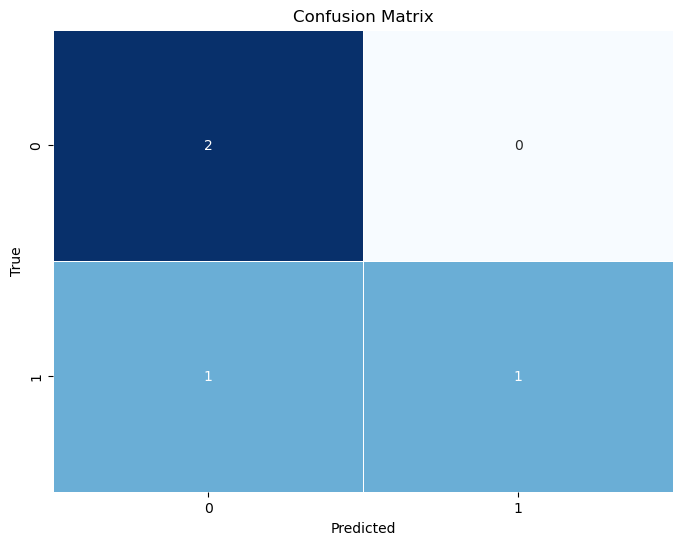

In [31]:
#Displaying the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(conf_marix,annot=True,fmt="d",cmap="Blues",linewidths=0.5,cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()